In [24]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS

In [3]:
train=pd.read_table('D:\\python\\Titanic_ML\\movie_revie\\train.tsv')

In [5]:
test=pd.read_table('D:\\python\\Titanic_ML\\movie_revie\\test.tsv')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 3 columns):
PhraseId      66292 non-null int64
SentenceId    66292 non-null int64
Phrase        66292 non-null object
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [9]:
sentiment_words=[]
for row in train['Sentiment']:
    if row==0:
        sentiment_words.append('negative')
    elif row==1:
        sentiment_words.append('neutral')
    elif row==2:
        sentiment_words.append('somewhat negative')
    elif row==3:
        sentiment_words.append('somewhat positive')
    elif row==4:
        sentiment_words.append('positive')
    else:
        sentiment_words.append('failed')
train['sentiment_words']=sentiment_words

In [11]:
word_count=pd.value_counts(train['sentiment_words'].values, sort=False)
word_count

positive              9206
somewhat negative    79582
neutral              27273
somewhat positive    32927
negative              7072
dtype: int64

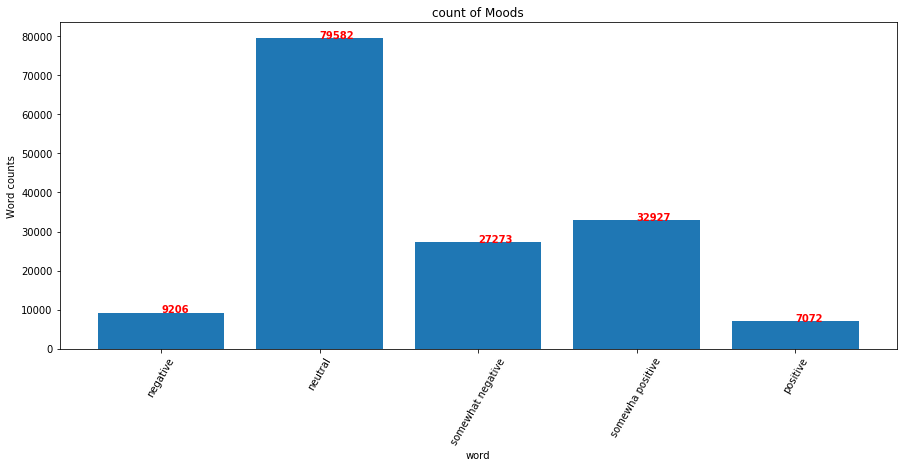

In [21]:
index=[1,2,3,4,5]
plt.figure(figsize=(15,6))
plt.bar(index, word_count, color='c')
plt.xticks(index, ['negative', 'neutral', 'somewhat negative', 'somewha positive', 'positive'], rotation=60)
plt.xlabel("word")
plt.ylabel("Word counts")
plt.title("count of Moods")
plt.bar(index, word_count)
for a, b in zip(index, word_count):
    plt.text(a, b , str(b), color='red', fontweight='bold')
plt.show()

In [27]:
def review_to_words(raw_review):
    review=raw_review
    review=re.sub('[^a-zA-Z]', ' ', review)
    review=review.lower()
    review=review.split()
    lemmatizer=WordNetLemmatizer()
    review=[lemmatizer.lemmatize(w) for w in review if not w in set(stopwords.words('english'))]
    return (''.join(review))

In [28]:
corpus=[]
for i in range(0, 156060):
    corpus.append(review_to_words(train['Phrase'][i]))

In [30]:
corpus1=[]
for i in range(0, 156060):
    corpus1.append(review_to_words(train['Phrase'][i]))

In [31]:
train['new_phrase']=corpus

In [33]:
train.drop(['Phrase'], axis=1, inplace=True)

In [34]:
train.head()

,PhraseId,SentenceId,Sentiment,sentiment_words,new_phrase
0,1,1,1,neutral,seriesescapadedemonstratingadagegoodgoosealsog...
1,2,1,2,somewhat negative,seriesescapadedemonstratingadagegoodgoose
2,3,1,2,somewhat negative,series
3,4,1,2,somewhat negative,
4,5,1,2,somewhat negative,series


In [35]:
positive=train[train['sentiment_words']==('positive')]

In [36]:
word=' '.join(positive['new_phrase'])
split_word=" ".join([word for word in word.split() ])

In [37]:
wordCloud=WordCloud(stopwords=STOPWORDS, background_color='black', width=3000, height=2500).generate(split_word)

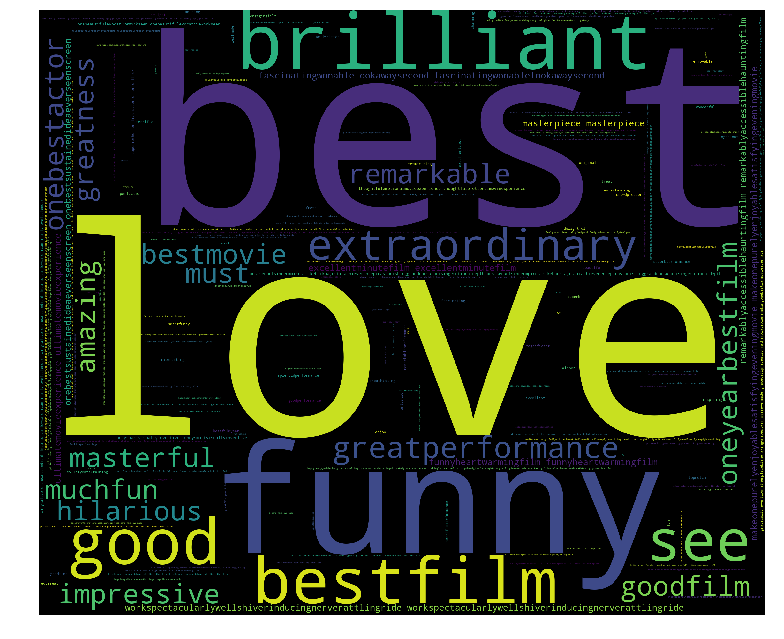

In [38]:
plt.figure(1, figsize=(13,13))
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

In [39]:
pos=positive['new_phrase']


In [40]:
vectorizer=CountVectorizer(analyzer='word', tokenizer=None, preprocessor=None, stop_words=None, max_features=2000)

In [41]:
pos_word=vectorizer.fit_transform(pos)


In [42]:
pos_word=pos_word.toarray()

In [43]:
pos=vectorizer.get_feature_names()

In [44]:
print(pos_word.shape)

(9206, 2000)


In [46]:
dis=np.sum(pos_word, axis=0)
for tag, count in zip(pos, dis):
    print(tag, count)

abilitymesmerizeastonishentertain 2
ableappreciatewonderfulcinematographynaturalisticacting 2
ablesharestorycompellinglyuminormiracle 3
absolutedelightaudience 2
absolutejoy 2
absolutelyamazing 2
accidentaccidentalspysolidactionpicreturnmartialartmastertopform 2
accidentalspysolidactionpicreturnmartialartmastertopform 2
accomplishedrichlyresonantwork 2
achievement 2
actorperfectcomictimingsweetgenuinechemistry 2
actorraymondjbarryperfectlycreepybelievable 2
actorsimplygood 2
actorsimplygoodstoryintriguing 2
actuallymakeheartsoar 3
addsatisfyingcrimedrama 3
admirable 2
admirableenergyfullbodiedcharacterization 2
adorablywhimsicalcomedydeservespassingtwinkle 2
adornsfamilyfilmplotelegancematurityevencontemporaryadultmovielacking 2
aliasbettyrichlydetaileddeftlyexecutedutterlyabsorbing 2
almostguaranteedevenstuffiestcinemagoerlaughhourhalf 2
almostimpossiblesweptawaysheerbeautyimage 4
almostseemendescompanygettingtogethersingleframeshotcollectivelyvowinggoingsomethingreallygood 2
alsodare

greatpiecewatchkiduseintroducevideoart 2
greatpleasure 2
greatpresence 2
greatscript 2
griffithwarmwinningcentralperformance 2
gripholdraptattention 2
grippingdocumentary 3
grippingdrama 2
grittystyleexcellentcast 2
guaranteedliftspiritwholefamily 3
guaranteeleavingtheatersmileface 2
handsomewellmadeentertainment 3
happyheadyjumblethoughtstorytelling 2
happyheadyjumblethoughtstorytellinginsanecomicundertakingultimatelycoheressanebreathtakinglycreativefilm 4
happyseen 2
hardconceiveanyoneelserole 3
hardheartedpersonmoveddrama 2
hardimagineanyonemanagingstealmoviecharismaticrisingstarjakegyllenhaalalsoaccomplishedoscarwinnersusansarandondustinhoffmanhollyhunteryetnewcomerellenpompeopullfeataplomb 3
hardimaginefunwatchingdocumentary 4
hardlyobjectivedocumentarygreatcinematicpolemiclovemooreloathegotadmireintensitywillingexpressconviction 2
hardpredictabsolutelyessentialchemistryearthbullocknonchalantgrantprofsensational 2
hardpredictabsolutelyessentialchemistryearthbullocknonchalantgrantp

packedadventureworthwhileenvironmentalmessage 4
packedadventureworthwhileenvironmentalmessagegreatkid 2
packedmuchintelligence 1
packedmuchintelligenceaction 3
packpowerfulemotionalwallop 1
packserioussuspense 1
painfulhorrifyingoppressivelytragicfilmmissed 1
paintgrandpictureeramakejourneyfeellikeparty 1
panamericanmoviemomentgenuineinsighturbanheart 1
pandersonunderstandsgrandnessromancelovegreatequalizercalmudailyillbringjoylifeneverknewpossible 1
pannalinexpositionbeautifulmysterious 2
pantheonbestswashbuckler 2
parablelovecharactercommunicatessomethingratherbeautifulhumannature 1
paranoidclaustrophobiasubmarinemovieunsettlingspookinesssupernaturalnhollywoodthinksooner 1
parentlovekid 1
parentmayevenfindgoquicklyfunniestjokemovieyearincludingintendedadult 1
parkercommendedtakingfreshapproachfamiliarmaterial 1
parkercowritercatherinedinapolifaithfulmelvilleplotlinefullyengagedsupportingcastmadeoldboycharacterquickwittedenglishlitmajorwouldthoughtpossible 1
partfilmcheekycharm 1
part

surprisinglyrefreshing 2
surprisinglysweetgentlecomedy 2
survivalwrappedheartpoundingsuspensestylishpsychologicalthriller 2
suspensefulultimatelyunpredictable 3
suspenseintriguingcharacter 2
sweatypalmedfun 2
sweet 2
sweetenjoyablefantasy 3
sweetfunnycharming 2
sweetfunnycharmingcompletelydelightful 4
sweethonestenjoyablecomedydrama 2
sweethonestenjoyablecomedydramayoungwomanwantmanythinglifefearbecomemothergetfulfilldream 3
sweetlaughminutecrowdpleaserliftspiritwellcornermouth 3
sweetnessclarityemotionalopenness 2
sweetnessextraordinarytechnicalaccomplishmentfirstfilm 2
sweetromantic 2
sweettreasuresomethingwellworth 2
sweettreasuresomethingwellworthtime 2
swingingtreehootingpraise 2
swoopingstringexoticlocalescoopingwholeworldjoyouscommunalfestivalrhythm 2
sylvietestudicilybrilliant 2
tackledmeatysubjectdrawnengagingcharacterpepperingpagememorablezinger 2
taiwaneseauteurtsaiminglianggoodnewsanyonefallensweetmelancholyspelluniquedirectorpreviousfilm 2
takebreathaway 2
takeclassicstory

In [47]:
positive_new=pd.DataFrame(dis)


In [48]:
positive_new.columns=['word_count']

In [49]:
positive_new['word']=pd.Series(pos, index=positive_new.index)

In [50]:
positive_new1=positive_new[['word', 'word_count']]

In [51]:
positive_new1.head()

,word,word_count
0,abilitymesmerizeastonishentertain,2
1,ableappreciatewonderfulcinematographynaturalis...,2
2,ablesharestorycompellinglyuminormiracle,3
3,absolutedelightaudience,2
4,absolutejoy,2


In [52]:
top_30_words=positive_new1.sort_values(['word_count'], ascending=[0])

In [53]:
top_30_words.head(10)

,word,word_count
1004,masterpiece,10
100,best,9
931,love,9
612,funny,7
668,good,6
713,greatfilm,6
111,bestfilm,6
166,brilliant,6
1846,ultimatemovieexperience,5
940,lovemovie,5


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
x_train=cv.fit_transform(corpus).toa

In [ ]:
from sklearn.cross_validation import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X__train) 